In [1]:
#Imports
import pandas as pd
import csv
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import io

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
#Cargamos fichero datos_filtrados.csv
df_datos_filtrados = pd.read_csv('../TFM/csv_bigdata/datos_filtrados.csv', sep=';')
df_datos_filtrados.head(10)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud
0,2015-01-01,Jueves,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478
1,2015-01-01,Jueves,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414
2,2015-01-01,Jueves,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396
3,2015-01-01,Jueves,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677
4,2015-01-01,Jueves,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994
5,2015-01-01,Jueves,00:15:01,A13,ALBORAIA,40,-0.368968,39.485116
6,2015-01-01,Jueves,00:15:01,A130,HERNAN CORTES,55,-0.371882,39.469184
7,2015-01-01,Jueves,00:15:01,A131,ISABEL DE VILLENA,16,-0.325794,39.479083
8,2015-01-01,Jueves,00:15:01,A132,ISABEL LA CATOLICA,18,-0.371171,39.469726
9,2015-01-01,Jueves,00:15:01,A133,ISLAS CANARIAS,49,-0.335863,39.461000


### Enero 2015

In [3]:
#Filtramos por Enero 2015
df_tramo_enero = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-01-01')& \
                              (df_datos_filtrados['fecha'] <= '2015-01-31')]\
                              .groupby(['id_tramo','des_tramo'])\
                              .estado.mean().to_frame().reset_index()
df_tramo_enero

,id_tramo,des_tramo,estado
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,2895.007206
1,A10,"ALAMEDA, PASEO DE",1192.788894
2,A102,ERNESTO FERRER,227.259480
3,A104,EUGENIA VIÑES,379.111959
4,A105,FILIPINAS,1029.488333
...,...,...,...
398,B93,REINA DOÑA GERMANA,90.969882
399,B94,RIO TAJO,34.946352
400,B95,RODRÍGUEZ DE CEPEDA,105.708048
401,B97,SAGASTA,166.334790


In [4]:
#Obtenemos los 10 tramos con mayor volumen de tráfico en Enero de 2015
df_max_tramo_enero = df_tramo_enero.nlargest(10, ['estado']) 
df_max_tramo_enero

,id_tramo,des_tramo,estado
219,A373,ACCESO SUR (N-332),4138.249894
280,A72,"AVDA. CID,",3818.644765
92,A193,PIO XII,3350.023315
241,A406,PROLONGACION JUAN XXIII Entre Hermnanos Machad...,3327.785926
68,A170,NUEVE DE OCTUBRE,3320.168010
239,A398,HNOS MACHADO(JUAN XXIII-CONST),3093.497669
289,A82,CORTES VALENCIANAS,3014.536668
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,2895.007206
166,A271,PUENTE DE LAS VIEJAS GLORIAS,2882.545146
179,A29,AUSIAS MARCH,2856.161646


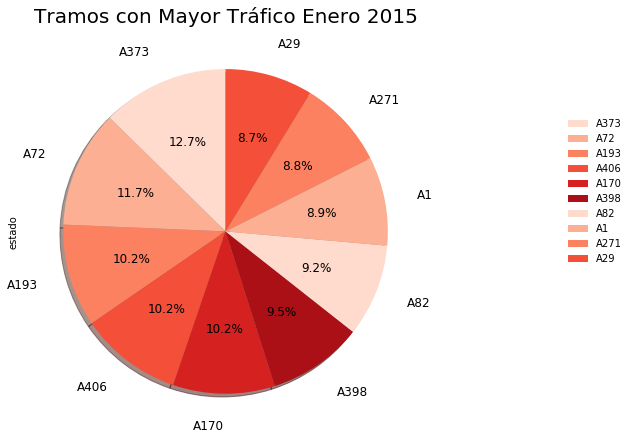

In [5]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
df_max_tramo_enero.plot(kind='pie', y = 'estado',colors = sns.color_palette("Reds"), ax=ax1, autopct='%1.1f%%',
 startangle=90,labeldistance=1.2, shadow=True, 
 labels=df_max_tramo_enero['id_tramo'], legend = False, fontsize=12)
ax1.set_title("Tramos con Mayor Tráfico Enero 2015",color='black',fontsize=20)
ax1.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

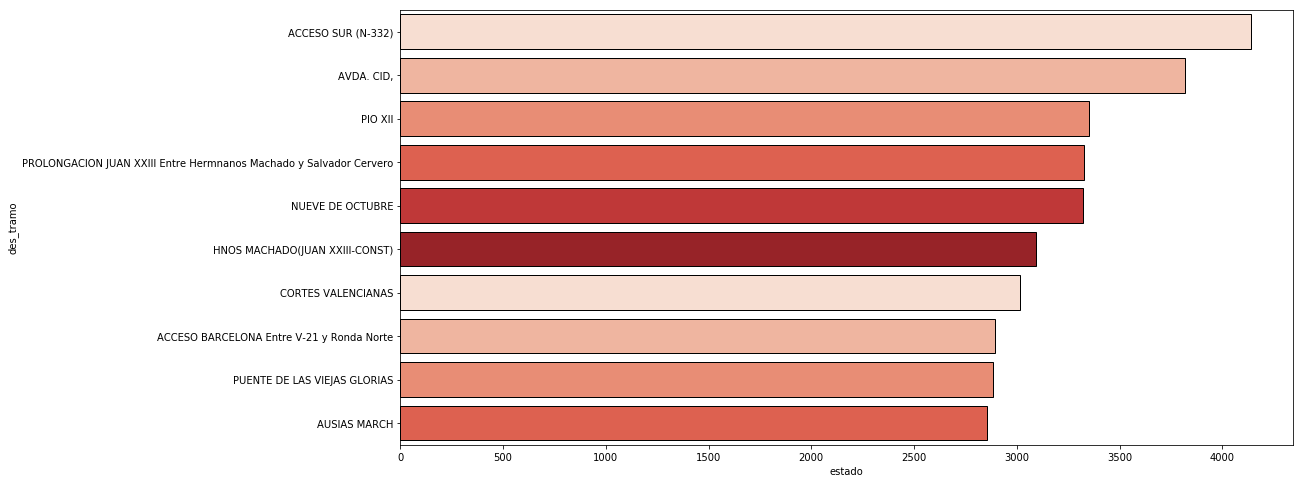

In [6]:
plt.subplots(figsize = (16,8))
sns.barplot(x='estado', y='des_tramo', data=df_max_tramo_enero,palette = sns.color_palette("Reds"), edgecolor = 'black')
plt.show()

### Febrero 2015

In [7]:
#Filtramos por Feberero 2015
df_tramo_febrero = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-02-01')& \
                              (df_datos_filtrados['fecha'] <= '2015-02-29')]\
                              .groupby(['id_tramo','des_tramo'])\
                              .estado.mean().to_frame().reset_index()
df_tramo_febrero

,id_tramo,des_tramo,estado
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3319.781605
1,A10,"ALAMEDA, PASEO DE",1396.781605
2,A102,ERNESTO FERRER,261.428746
3,A104,EUGENIA VIÑES,419.621151
4,A105,FILIPINAS,1169.181524
...,...,...,...
398,B93,REINA DOÑA GERMANA,115.569444
399,B94,RIO TAJO,41.453184
400,B95,RODRÍGUEZ DE CEPEDA,122.890795
401,B97,SAGASTA,204.887768


In [8]:
#Obtenemos los 10 tramos con mayor volumen de tráfico en Febrero de 2015
df_max_tramo_febrero = df_tramo_febrero.nlargest(10, ['estado']) 
df_max_tramo_febrero

,id_tramo,des_tramo,estado
219,A373,ACCESO SUR (N-332),4729.277958
280,A72,"AVDA. CID,",4406.202188
92,A193,PIO XII,3899.086305
241,A406,PROLONGACION JUAN XXIII Entre Hermnanos Machad...,3728.773906
68,A170,NUEVE DE OCTUBRE,3500.179903
289,A82,CORTES VALENCIANAS,3477.119125
239,A398,HNOS MACHADO(JUAN XXIII-CONST),3456.002836
166,A271,PUENTE DE LAS VIEJAS GLORIAS,3337.229335
179,A29,AUSIAS MARCH,3334.578201
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3319.781605


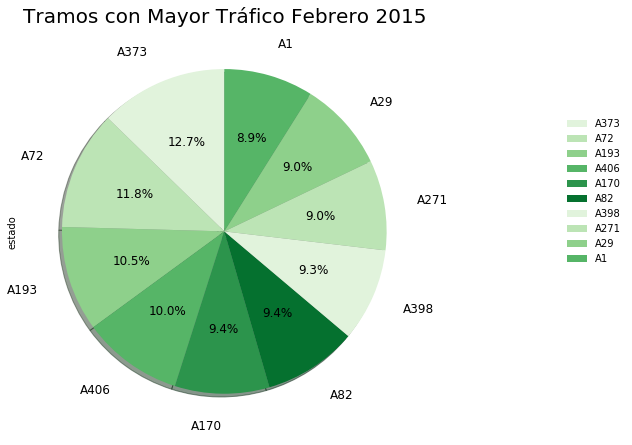

In [9]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
df_max_tramo_febrero.plot(kind='pie', y = 'estado',colors = sns.color_palette("Greens"), ax=ax1, autopct='%1.1f%%',
 startangle=90,labeldistance=1.2, shadow=True, 
 labels=df_max_tramo_febrero['id_tramo'], legend = False, fontsize=12)
ax1.set_title("Tramos con Mayor Tráfico Febrero 2015",color='black',fontsize=20)
ax1.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

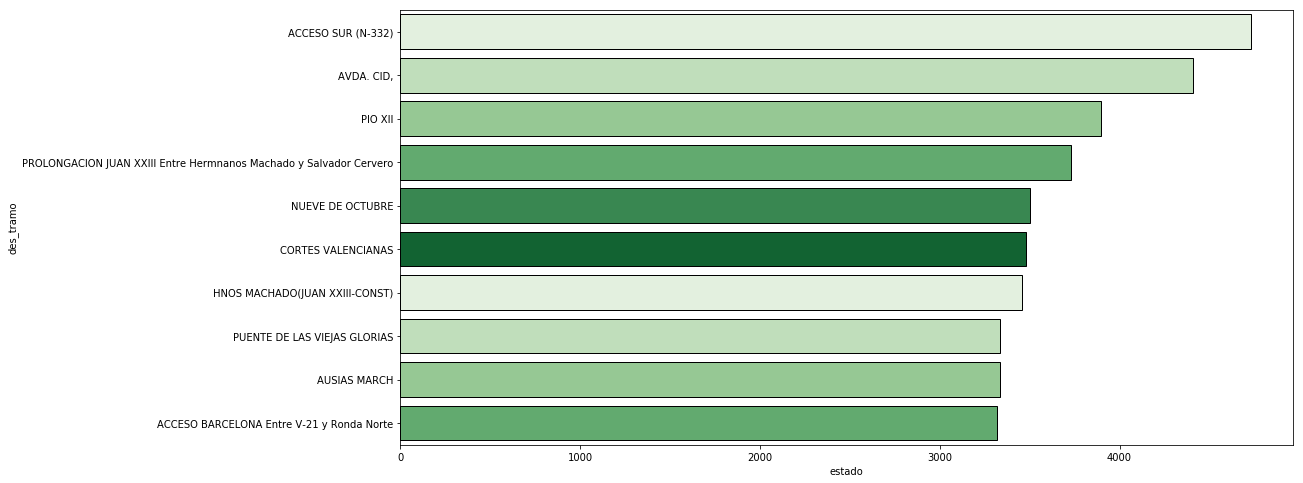

In [10]:
plt.subplots(figsize = (16,8))
sns.barplot(x='estado', y='des_tramo', data=df_max_tramo_febrero,palette = sns.color_palette("Greens"), edgecolor = 'black')
plt.show()

### Marzo 2015

In [11]:
#Filtramos por Marzo 2015
df_tramo_marzo = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-03-01')& \
                              (df_datos_filtrados['fecha'] <= '2015-03-31')]\
                              .groupby(['id_tramo','des_tramo'])\
                              .estado.mean().to_frame().reset_index()
df_tramo_marzo

,id_tramo,des_tramo,estado
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,2880.115539
1,A10,"ALAMEDA, PASEO DE",1099.477148
2,A102,ERNESTO FERRER,213.848773
3,A104,EUGENIA VIÑES,417.987934
4,A105,FILIPINAS,995.697989
...,...,...,...
398,B93,REINA DOÑA GERMANA,86.002358
399,B94,RIO TAJO,40.038329
400,B95,RODRÍGUEZ DE CEPEDA,92.992765
401,B97,SAGASTA,146.385335


In [12]:
#Obtenemos los 10 tramos con mayor volumen de tráfico en Marzo de 2015
df_max_tramo_marzo = df_tramo_marzo.nlargest(10, ['estado']) 
df_max_tramo_marzo

,id_tramo,des_tramo,estado
219,A373,ACCESO SUR (N-332),4088.524506
280,A72,"AVDA. CID,",3778.174771
241,A406,PROLONGACION JUAN XXIII Entre Hermnanos Machad...,3298.282998
92,A193,PIO XII,3240.524314
239,A398,HNOS MACHADO(JUAN XXIII-CONST),3133.164899
68,A170,NUEVE DE OCTUBRE,3008.852285
289,A82,CORTES VALENCIANAS,2932.663254
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,2880.115539
179,A29,AUSIAS MARCH,2810.567824
267,A59,CAMINO NUEVO DE PICANYA,2775.387203


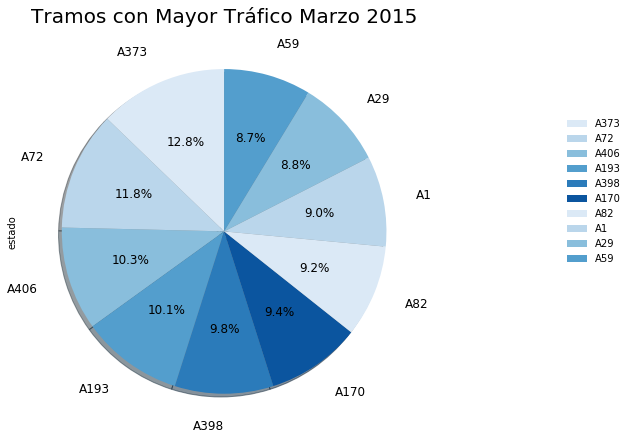

In [13]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
df_max_tramo_marzo.plot(kind='pie', y = 'estado',colors = sns.color_palette("Blues"), ax=ax1, autopct='%1.1f%%',
 startangle=90,labeldistance=1.2, shadow=True, 
 labels=df_max_tramo_marzo['id_tramo'], legend = False, fontsize=12)
ax1.set_title("Tramos con Mayor Tráfico Marzo 2015",color='black',fontsize=20)
ax1.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

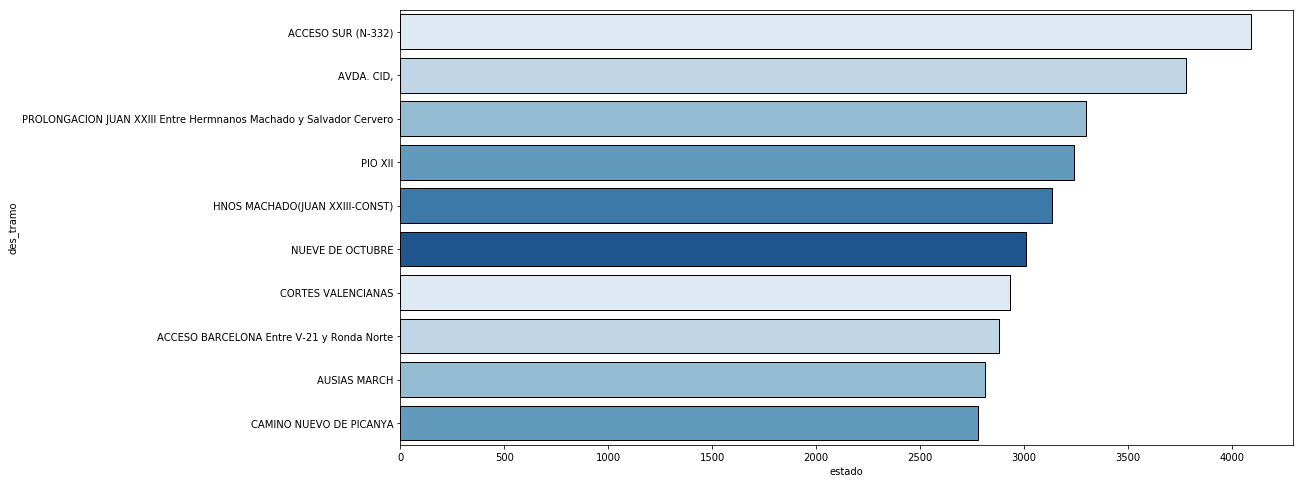

In [14]:
plt.subplots(figsize = (16,8))
sns.barplot(x='estado', y='des_tramo', data=df_max_tramo_marzo,palette = sns.color_palette("Blues"), edgecolor = 'black')
plt.show()

### Abril 2015

In [15]:
#Filtramos por Abril 2015
df_tramo_abril = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-04-01')& \
                              (df_datos_filtrados['fecha'] <= '2015-04-30')]\
                              .groupby(['id_tramo','des_tramo'])\
                              .estado.mean().to_frame().reset_index()
df_tramo_abril

,id_tramo,des_tramo,estado
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3249.231783
1,A10,"ALAMEDA, PASEO DE",1371.945349
2,A102,ERNESTO FERRER,242.104321
3,A104,EUGENIA VIÑES,486.112791
4,A105,FILIPINAS,1071.199225
...,...,...,...
398,B93,REINA DOÑA GERMANA,96.275170
399,B94,RIO TAJO,38.091588
400,B95,RODRÍGUEZ DE CEPEDA,113.137109
401,B97,SAGASTA,178.980622


In [16]:
#Obtenemos los 10 tramos con mayor volumen de tráfico en Abril de 2015
df_max_tramo_abril = df_tramo_abril.nlargest(10, ['estado']) 
df_max_tramo_abril

,id_tramo,des_tramo,estado
219,A373,ACCESO SUR (N-332),4548.562403
280,A72,"AVDA. CID,",4213.307752
241,A406,PROLONGACION JUAN XXIII Entre Hermnanos Machad...,3736.972093
92,A193,PIO XII,3697.404651
239,A398,HNOS MACHADO(JUAN XXIII-CONST),3470.525581
289,A82,CORTES VALENCIANAS,3313.875581
68,A170,NUEVE DE OCTUBRE,3256.377132
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3249.231783
179,A29,AUSIAS MARCH,3126.498062
267,A59,CAMINO NUEVO DE PICANYA,3105.085659


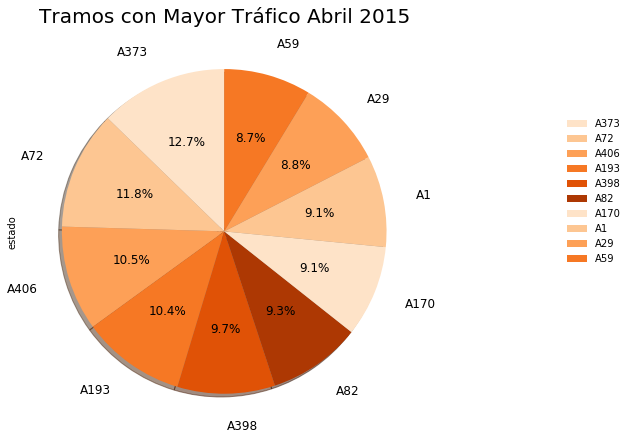

In [17]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
df_max_tramo_abril.plot(kind='pie', y = 'estado',colors = sns.color_palette("Oranges"), ax=ax1, autopct='%1.1f%%',
 startangle=90,labeldistance=1.2, shadow=True, 
 labels=df_max_tramo_abril['id_tramo'], legend = False, fontsize=12)
ax1.set_title("Tramos con Mayor Tráfico Abril 2015",color='black',fontsize=20)
ax1.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

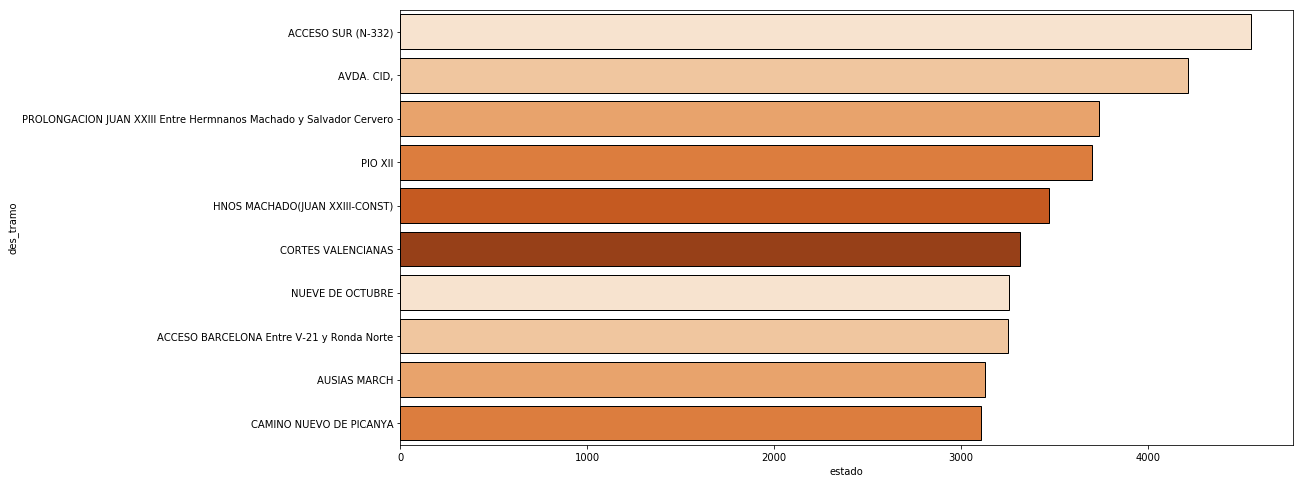

In [18]:
plt.subplots(figsize = (16,8))
sns.barplot(x='estado', y='des_tramo', data=df_max_tramo_abril,palette = sns.color_palette("Oranges"), edgecolor = 'black')
plt.show()

### Mayo 2015

In [19]:
#Filtramos por Mayo 2015
df_tramo_mayo = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-05-01')& \
                              (df_datos_filtrados['fecha'] <= '2015-05-31')]\
                              .groupby(['id_tramo','des_tramo'])\
                              .estado.mean().to_frame().reset_index()
df_tramo_mayo

,id_tramo,des_tramo,estado
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3169.323964
1,A10,"ALAMEDA, PASEO DE",1216.815828
2,A102,ERNESTO FERRER,227.758723
3,A104,EUGENIA VIÑES,554.254438
4,A105,FILIPINAS,1021.015902
...,...,...,...
398,B93,REINA DOÑA GERMANA,90.109668
399,B94,RIO TAJO,39.032042
400,B95,RODRÍGUEZ DE CEPEDA,110.541979
401,B97,SAGASTA,163.613014


In [20]:
#Obtenemos los 10 tramos con mayor volumen de tráfico en Mayo de 2015
df_max_tramo_mayo = df_tramo_mayo.nlargest(10, ['estado']) 
df_max_tramo_mayo

,id_tramo,des_tramo,estado
219,A373,ACCESO SUR (N-332),4336.346893
280,A72,"AVDA. CID,",4023.485207
241,A406,PROLONGACION JUAN XXIII Entre Hermnanos Machad...,3577.384985
92,A193,PIO XII,3499.509246
239,A398,HNOS MACHADO(JUAN XXIII-CONST),3420.787722
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3169.323964
289,A82,CORTES VALENCIANAS,3123.196006
179,A29,AUSIAS MARCH,2949.345414
166,A271,PUENTE DE LAS VIEJAS GLORIAS,2946.851331
267,A59,CAMINO NUEVO DE PICANYA,2903.102441


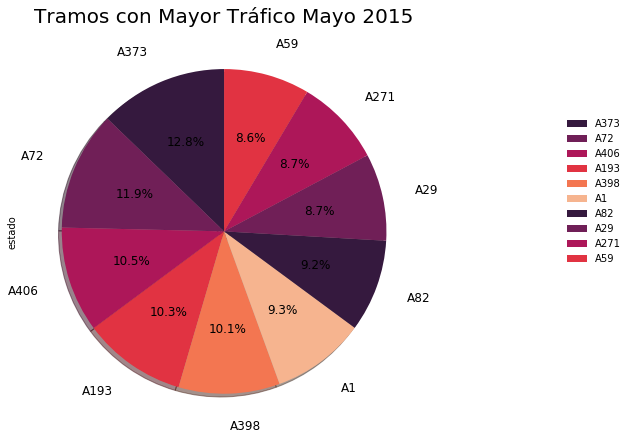

In [21]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
df_max_tramo_mayo.plot(kind='pie', y = 'estado',colors = sns.color_palette("rocket"), ax=ax1, autopct='%1.1f%%',
 startangle=90,labeldistance=1.2, shadow=True, 
 labels=df_max_tramo_mayo['id_tramo'], legend = False, fontsize=12)
ax1.set_title("Tramos con Mayor Tráfico Mayo 2015",color='black',fontsize=20)
ax1.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

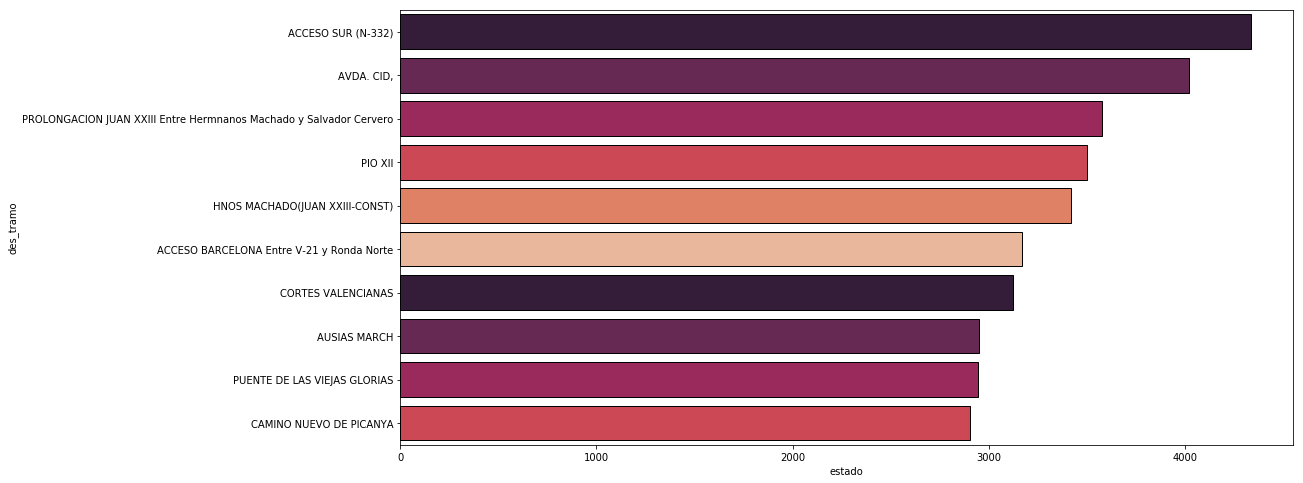

In [22]:
plt.subplots(figsize = (16,8))
sns.barplot(x='estado', y='des_tramo', data=df_max_tramo_mayo,palette = sns.color_palette("rocket"), edgecolor = 'black')
plt.show()

### Junio 2015

In [23]:
#Filtramos por Junio 2015
df_tramo_junio = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-06-01')& \
                              (df_datos_filtrados['fecha'] <= '2015-06-30')]\
                              .groupby(['id_tramo','des_tramo'])\
                              .estado.mean().to_frame().reset_index()
df_tramo_junio

,id_tramo,des_tramo,estado
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3104.773188
1,A10,"ALAMEDA, PASEO DE",1162.927903
2,A102,ERNESTO FERRER,210.736100
3,A104,EUGENIA VIÑES,631.882697
4,A105,FILIPINAS,961.657054
...,...,...,...
398,B93,REINA DOÑA GERMANA,80.109864
399,B94,RIO TAJO,36.908023
400,B95,RODRÍGUEZ DE CEPEDA,103.423896
401,B97,SAGASTA,152.333466


In [24]:
#Obtenemos los 10 tramos con mayor volumen de tráfico en Junio de 2015
df_max_tramo_junio = df_tramo_junio.nlargest(10, ['estado']) 
df_max_tramo_junio

,id_tramo,des_tramo,estado
219,A373,ACCESO SUR (N-332),4109.117693
280,A72,"AVDA. CID,",3771.000779
92,A193,PIO XII,3375.784100
241,A406,PROLONGACION JUAN XXIII Entre Hermnanos Machad...,3364.408807
239,A398,HNOS MACHADO(JUAN XXIII-CONST),3158.345284
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3104.773188
289,A82,CORTES VALENCIANAS,2918.053001
68,A170,NUEVE DE OCTUBRE,2874.310990
179,A29,AUSIAS MARCH,2816.772019
84,A186,PEREZ GALDOS,2750.206547


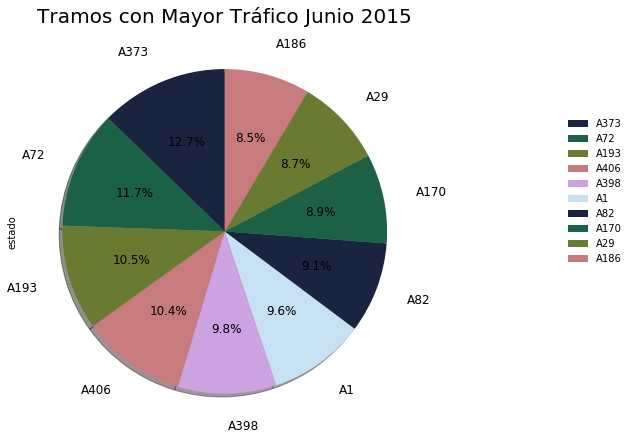

In [25]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
df_max_tramo_junio.plot(kind='pie', y = 'estado',colors = sns.color_palette("cubehelix"), ax=ax1, autopct='%1.1f%%',
 startangle=90,labeldistance=1.2, shadow=True, 
 labels=df_max_tramo_junio['id_tramo'], legend = False, fontsize=12)
ax1.set_title("Tramos con Mayor Tráfico Junio 2015",color='black',fontsize=20)
ax1.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

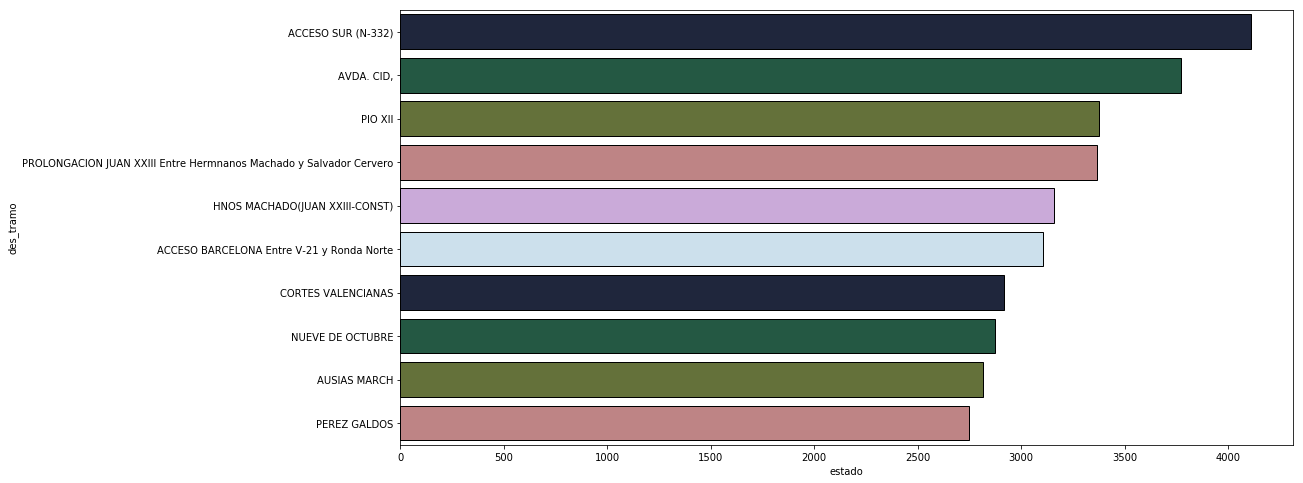

In [26]:
plt.subplots(figsize = (16,8))
sns.barplot(x='estado', y='des_tramo', data=df_max_tramo_junio,palette = sns.color_palette("cubehelix"), edgecolor = 'black')
plt.show()

### Julio 2015

In [27]:
#Filtramos por Julio 2015
df_tramo_julio = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-07-01')& \
                              (df_datos_filtrados['fecha'] <= '2015-07-31')]\
                              .groupby(['id_tramo','des_tramo'])\
                              .estado.mean().to_frame().reset_index()
df_tramo_julio

,id_tramo,des_tramo,estado
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3647.597496
1,A10,"ALAMEDA, PASEO DE",1299.121396
2,A102,ERNESTO FERRER,223.302591
3,A104,EUGENIA VIÑES,678.663885
4,A105,FILIPINAS,1098.012140
...,...,...,...
398,B93,REINA DOÑA GERMANA,89.730337
399,B94,RIO TAJO,37.958143
400,B95,RODRÍGUEZ DE CEPEDA,111.026427
401,B97,SAGASTA,188.359737


In [28]:
#Obtenemos los 10 tramos con mayor volumen de tráfico en Julio de 2015
df_max_tramo_julio = df_tramo_julio.nlargest(10, ['estado']) 
df_max_tramo_julio

,id_tramo,des_tramo,estado
219,A373,ACCESO SUR (N-332),4559.122155
280,A72,"AVDA. CID,",4204.088459
241,A406,PROLONGACION JUAN XXIII Entre Hermnanos Machad...,3682.892261
92,A193,PIO XII,3680.128983
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3647.597496
239,A398,HNOS MACHADO(JUAN XXIII-CONST),3467.529211
289,A82,CORTES VALENCIANAS,3303.503794
68,A170,NUEVE DE OCTUBRE,3230.327259
179,A29,AUSIAS MARCH,3124.801973
166,A271,PUENTE DE LAS VIEJAS GLORIAS,3067.869879


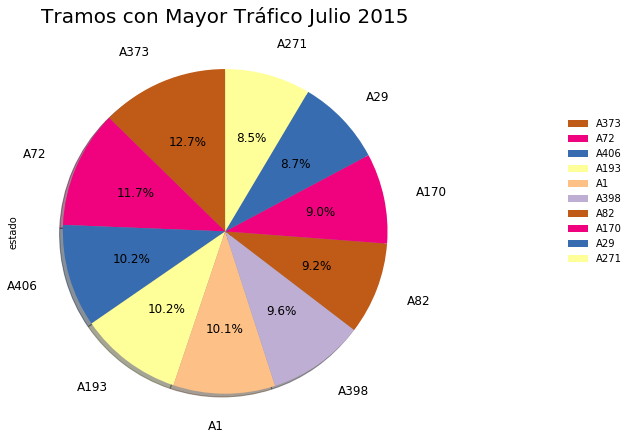

In [29]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
df_max_tramo_julio.plot(kind='pie', y = 'estado',colors = sns.color_palette("Accent_r"), ax=ax1, autopct='%1.1f%%',
 startangle=90,labeldistance=1.2, shadow=True, 
 labels=df_max_tramo_julio['id_tramo'], legend = False, fontsize=12)
ax1.set_title("Tramos con Mayor Tráfico Julio 2015",color='black',fontsize=20)
ax1.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

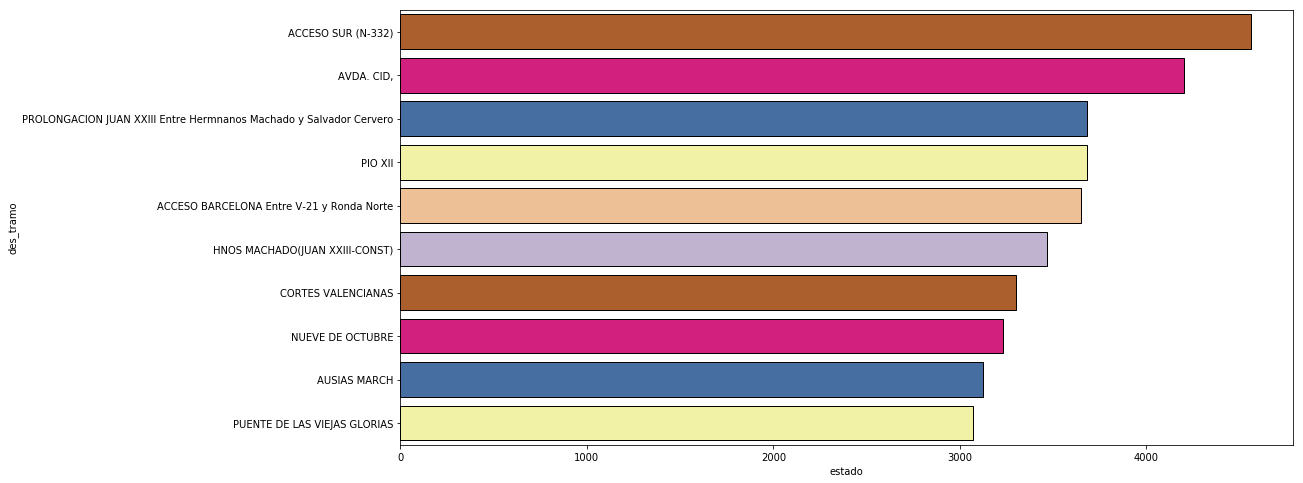

In [30]:
plt.subplots(figsize = (16,8))
sns.barplot(x='estado', y='des_tramo', data=df_max_tramo_julio,palette = sns.color_palette("Accent_r"), edgecolor = 'black')
plt.show()

### Agosto 2015

In [31]:
#Filtramos por Agosto 2015
df_tramo_agosto = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-08-01')& \
                              (df_datos_filtrados['fecha'] <= '2015-08-31')]\
                              .groupby(['id_tramo','des_tramo'])\
                              .estado.mean().to_frame().reset_index()
df_tramo_agosto

,id_tramo,des_tramo,estado
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,2753.946785
1,A10,"ALAMEDA, PASEO DE",905.581375
2,A102,ERNESTO FERRER,159.513129
3,A104,EUGENIA VIÑES,515.896674
4,A105,FILIPINAS,811.232816
...,...,...,...
398,B93,REINA DOÑA GERMANA,62.195551
399,B94,RIO TAJO,30.552690
400,B95,RODRÍGUEZ DE CEPEDA,76.687416
401,B97,SAGASTA,135.006323


In [32]:
#Obtenemos los 10 tramos con mayor volumen de tráfico en Agosto de 2015
df_max_tramo_agosto = df_tramo_agosto.nlargest(10, ['estado']) 
df_max_tramo_agosto

,id_tramo,des_tramo,estado
219,A373,ACCESO SUR (N-332),3518.059867
280,A72,"AVDA. CID,",3191.745011
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,2753.946785
241,A406,PROLONGACION JUAN XXIII Entre Hermnanos Machad...,2708.344124
92,A193,PIO XII,2637.330377
239,A398,HNOS MACHADO(JUAN XXIII-CONST),2529.327716
68,A170,NUEVE DE OCTUBRE,2435.208426
289,A82,CORTES VALENCIANAS,2400.408426
179,A29,AUSIAS MARCH,2377.564523
267,A59,CAMINO NUEVO DE PICANYA,2243.646563


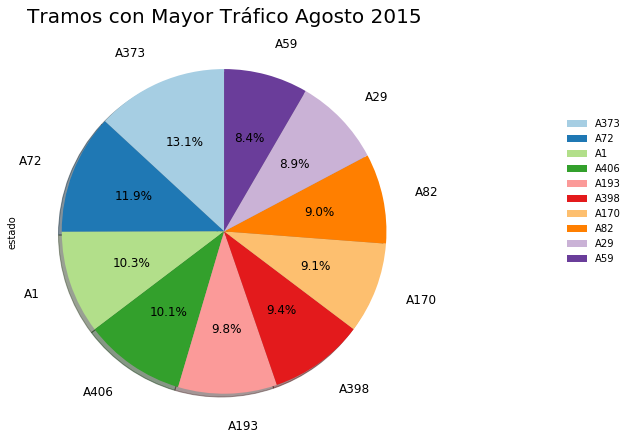

In [33]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
df_max_tramo_agosto.plot(kind='pie', y = 'estado',colors = sns.color_palette("Paired"), ax=ax1, autopct='%1.1f%%',
 startangle=90,labeldistance=1.2, shadow=True, 
 labels=df_max_tramo_agosto['id_tramo'], legend = False, fontsize=12)
ax1.set_title("Tramos con Mayor Tráfico Agosto 2015",color='black',fontsize=20)
ax1.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

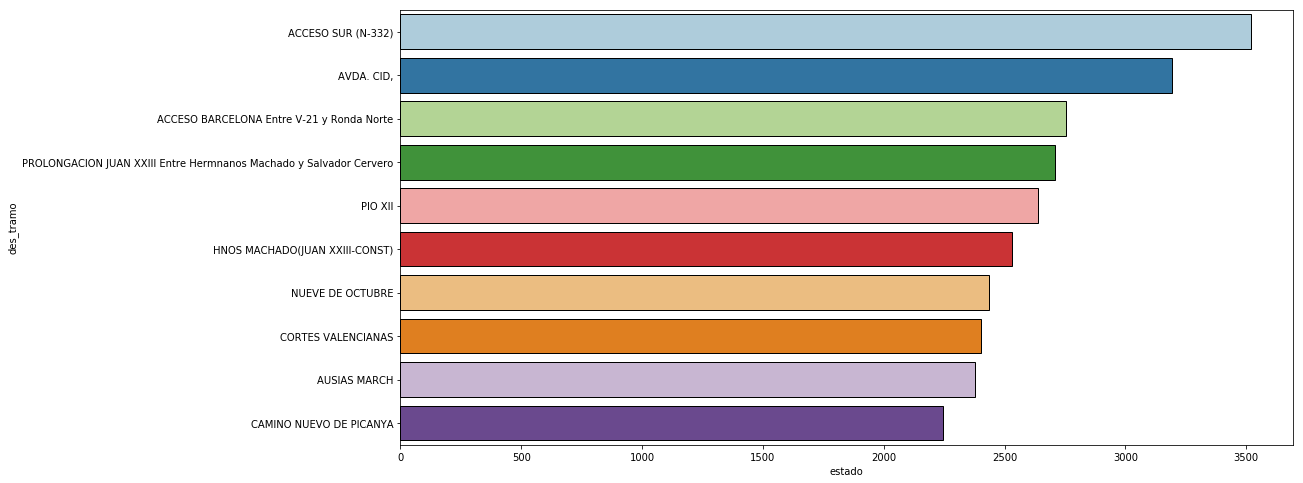

In [34]:
plt.subplots(figsize = (16,8))
sns.barplot(x='estado', y='des_tramo', data=df_max_tramo_agosto,palette = sns.color_palette("Paired"), edgecolor = 'black')
plt.show()

### Septiembre 2015

In [35]:
#Filtramos por Septiembre 2015
df_tramo_septiembre = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-09-01')& \
                              (df_datos_filtrados['fecha'] <= '2015-09-30')]\
                              .groupby(['id_tramo','des_tramo'])\
                              .estado.mean().to_frame().reset_index()
df_tramo_septiembre

,id_tramo,des_tramo,estado
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3142.694060
1,A10,"ALAMEDA, PASEO DE",1248.175395
2,A102,ERNESTO FERRER,227.466109
3,A104,EUGENIA VIÑES,392.349791
4,A105,FILIPINAS,1019.963272
...,...,...,...
398,B93,REINA DOÑA GERMANA,91.420455
399,B94,RIO TAJO,35.734124
400,B95,RODRÍGUEZ DE CEPEDA,104.801688
401,B97,SAGASTA,180.787307


In [36]:
#Obtenemos los 10 tramos con mayor volumen de tráfico en Septiembre de 2015
df_max_tramo_septiembre = df_tramo_septiembre.nlargest(10, ['estado']) 
df_max_tramo_septiembre

,id_tramo,des_tramo,estado
219,A373,ACCESO SUR (N-332),4208.926544
280,A72,"AVDA. CID,",4034.783874
241,A406,PROLONGACION JUAN XXIII Entre Hermnanos Machad...,3529.341646
92,A193,PIO XII,3446.072319
239,A398,HNOS MACHADO(JUAN XXIII-CONST),3247.202826
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3142.694060
68,A170,NUEVE DE OCTUBRE,3120.544472
289,A82,CORTES VALENCIANAS,3073.111388
179,A29,AUSIAS MARCH,2981.942404
267,A59,CAMINO NUEVO DE PICANYA,2943.730673


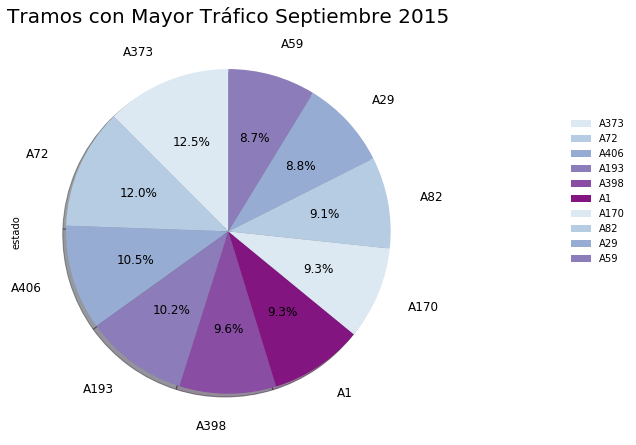

In [37]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
df_max_tramo_septiembre.plot(kind='pie', y = 'estado',colors = sns.color_palette("BuPu"), ax=ax1, autopct='%1.1f%%',
 startangle=90,labeldistance=1.2, shadow=True, 
 labels=df_max_tramo_septiembre['id_tramo'], legend = False, fontsize=12)
ax1.set_title("Tramos con Mayor Tráfico Septiembre 2015",color='black',fontsize=20)
ax1.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

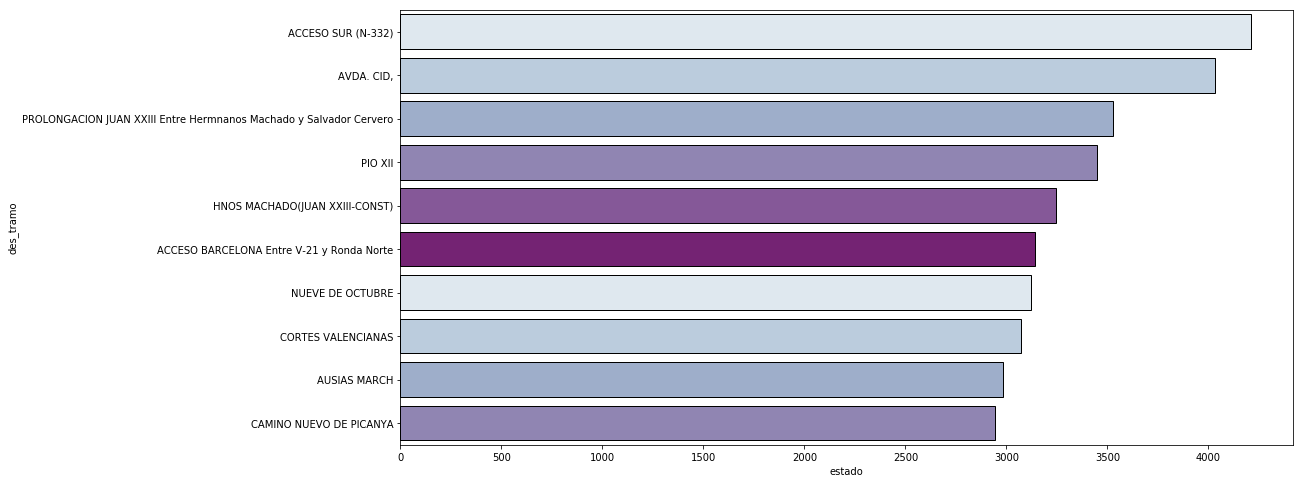

In [38]:
plt.subplots(figsize = (16,8))
sns.barplot(x='estado', y='des_tramo', data=df_max_tramo_septiembre,palette = sns.color_palette("BuPu"), edgecolor = 'black')
plt.show()

### Octubre 2015

In [39]:
#Filtramos por Octubre 2015
df_tramo_octubre = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-10-01')& \
                              (df_datos_filtrados['fecha'] <= '2015-10-30')]\
                              .groupby(['id_tramo','des_tramo'])\
                              .estado.mean().to_frame().reset_index()
df_tramo_octubre

,id_tramo,des_tramo,estado
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3251.420910
1,A10,"ALAMEDA, PASEO DE",1361.971049
2,A102,ERNESTO FERRER,245.892296
3,A104,EUGENIA VIÑES,411.675274
4,A105,FILIPINAS,1108.048494
...,...,...,...
398,B93,REINA DOÑA GERMANA,103.589329
399,B94,RIO TAJO,38.160997
400,B95,RODRÍGUEZ DE CEPEDA,105.919152
401,B97,SAGASTA,206.512360


In [40]:
#Obtenemos los 10 tramos con mayor volumen de tráfico en Octubre de 2015
df_max_tramo_octubre = df_tramo_octubre.nlargest(10, ['estado']) 
df_max_tramo_octubre

,id_tramo,des_tramo,estado
219,A373,ACCESO SUR (N-332),4551.301525
280,A72,"AVDA. CID,",4203.678013
92,A193,PIO XII,3758.914319
241,A406,PROLONGACION JUAN XXIII Entre Hermnanos Machad...,3699.780516
68,A170,NUEVE DE OCTUBRE,3518.808685
239,A398,HNOS MACHADO(JUAN XXIII-CONST),3417.454225
289,A82,CORTES VALENCIANAS,3385.664319
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3251.420910
179,A29,AUSIAS MARCH,3173.554165
166,A271,PUENTE DE LAS VIEJAS GLORIAS,3119.002739


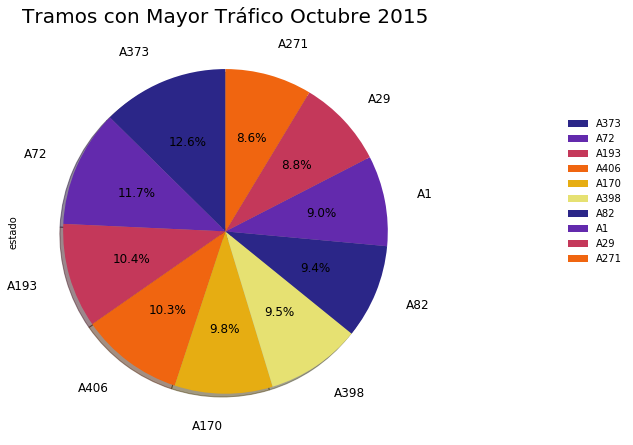

In [41]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
df_max_tramo_octubre.plot(kind='pie', y = 'estado',colors = sns.color_palette("CMRmap"), ax=ax1, autopct='%1.1f%%',
 startangle=90,labeldistance=1.2, shadow=True, 
 labels=df_max_tramo_octubre['id_tramo'], legend = False, fontsize=12)
ax1.set_title("Tramos con Mayor Tráfico Octubre 2015",color='black',fontsize=20)
ax1.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

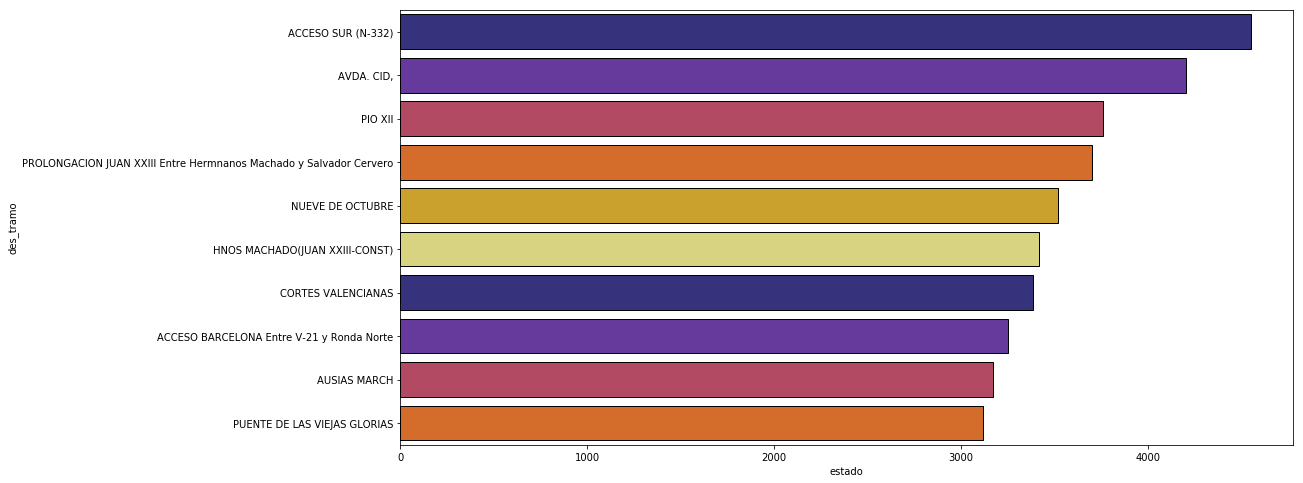

In [42]:
plt.subplots(figsize = (16,8))
sns.barplot(x='estado', y='des_tramo', data=df_max_tramo_octubre,palette = sns.color_palette("CMRmap"), edgecolor = 'black')
plt.show()

### Noviembre 2015

In [43]:
#Filtramos por Noviembre 2015
df_tramo_noviembre = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-11-01')& \
                              (df_datos_filtrados['fecha'] <= '2015-11-30')]\
                              .groupby(['id_tramo','des_tramo'])\
                              .estado.mean().to_frame().reset_index()
df_tramo_noviembre

,id_tramo,des_tramo,estado
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3021.796303
1,A10,"ALAMEDA, PASEO DE",1283.401398
2,A102,ERNESTO FERRER,230.266617
3,A104,EUGENIA VIÑES,398.310269
4,A105,FILIPINAS,1096.121752
...,...,...,...
398,B93,REINA DOÑA GERMANA,98.350038
399,B94,RIO TAJO,37.027985
400,B95,RODRÍGUEZ DE CEPEDA,97.607328
401,B97,SAGASTA,194.375794


In [44]:
#Obtenemos los 10 tramos con mayor volumen de tráfico en Noviembre de 2015
df_max_tramo_noviembre = df_tramo_noviembre.nlargest(10, ['estado']) 
df_max_tramo_noviembre

,id_tramo,des_tramo,estado
219,A373,ACCESO SUR (N-332),4306.222222
280,A72,"AVDA. CID,",3871.798749
241,A406,PROLONGACION JUAN XXIII Entre Hermnanos Machad...,3560.988126
92,A193,PIO XII,3554.000736
239,A398,HNOS MACHADO(JUAN XXIII-CONST),3275.676067
289,A82,CORTES VALENCIANAS,3189.473142
68,A170,NUEVE DE OCTUBRE,3048.974246
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3021.796303
166,A271,PUENTE DE LAS VIEJAS GLORIAS,2964.068065
179,A29,AUSIAS MARCH,2946.352595


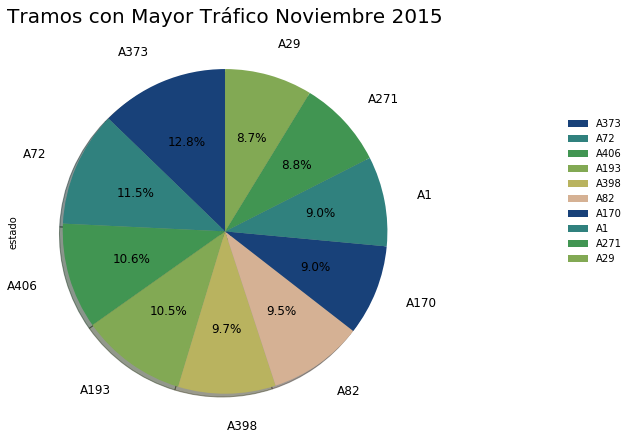

In [45]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
df_max_tramo_noviembre.plot(kind='pie', y = 'estado',colors = sns.color_palette("gist_earth"), ax=ax1, autopct='%1.1f%%',
 startangle=90,labeldistance=1.2, shadow=True, 
 labels=df_max_tramo_noviembre['id_tramo'], legend = False, fontsize=12)
ax1.set_title("Tramos con Mayor Tráfico Noviembre 2015",color='black',fontsize=20)
ax1.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

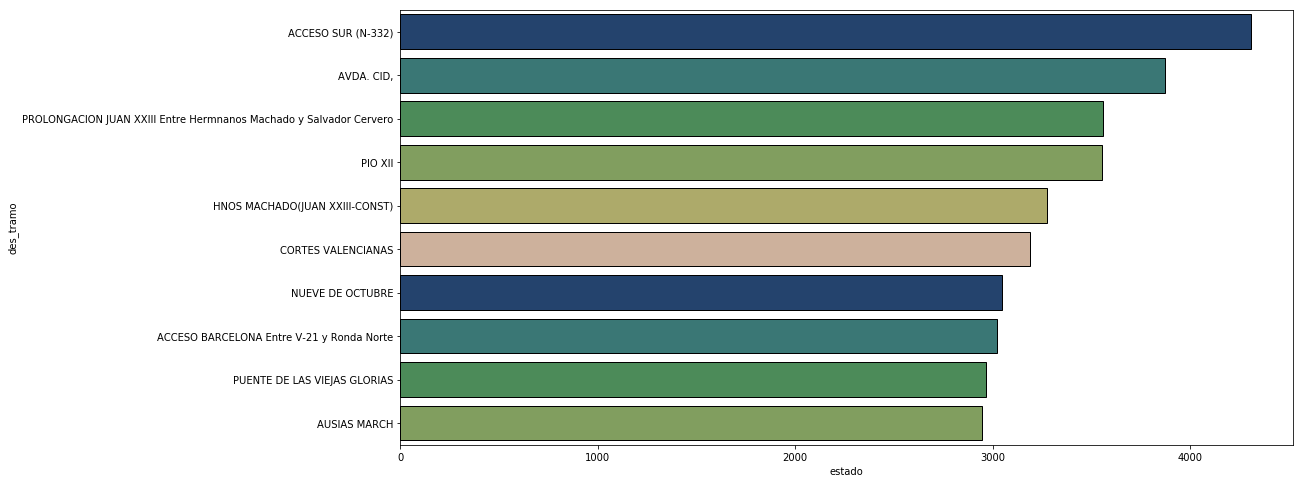

In [46]:
plt.subplots(figsize = (16,8))
sns.barplot(x='estado', y='des_tramo', data=df_max_tramo_noviembre,palette = sns.color_palette("gist_earth"), edgecolor = 'black')
plt.show()

### Diciembre 2015

In [47]:
#Filtramos por Diciembre 2015
df_tramo_diciembre = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-12-01')& \
                              (df_datos_filtrados['fecha'] <= '2015-12-31')]\
                              .groupby(['id_tramo','des_tramo'])\
                              .estado.mean().to_frame().reset_index()
df_tramo_diciembre

,id_tramo,des_tramo,estado
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,2892.929693
1,A10,"ALAMEDA, PASEO DE",1224.229042
2,A102,ERNESTO FERRER,221.600375
3,A104,EUGENIA VIÑES,401.643388
4,A105,FILIPINAS,994.310513
...,...,...,...
398,B93,REINA DOÑA GERMANA,96.423800
399,B94,RIO TAJO,35.666292
400,B95,RODRÍGUEZ DE CEPEDA,94.421987
401,B97,SAGASTA,176.279909


In [48]:
#Obtenemos los 10 tramos con mayor volumen de tráfico en Noviembre de 2015
df_max_tramo_diciembre = df_tramo_diciembre.nlargest(10, ['estado']) 
df_max_tramo_diciembre

,id_tramo,des_tramo,estado
219,A373,ACCESO SUR (N-332),4149.861401
280,A72,"AVDA. CID,",3741.328264
92,A193,PIO XII,3463.263353
241,A406,PROLONGACION JUAN XXIII Entre Hermnanos Machad...,3344.294709
289,A82,CORTES VALENCIANAS,3109.084923
239,A398,HNOS MACHADO(JUAN XXIII-CONST),3089.657973
166,A271,PUENTE DE LAS VIEJAS GLORIAS,2910.682936
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,2892.929693
179,A29,AUSIAS MARCH,2840.332585
68,A170,NUEVE DE OCTUBRE,2798.908718


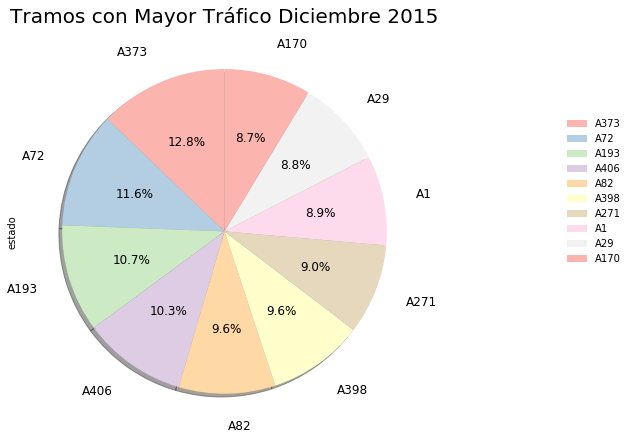

In [49]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
df_max_tramo_diciembre.plot(kind='pie', y = 'estado',colors = sns.color_palette("Pastel1"), ax=ax1, autopct='%1.1f%%',
 startangle=90,labeldistance=1.2, shadow=True, 
 labels=df_max_tramo_diciembre['id_tramo'], legend = False, fontsize=12)
ax1.set_title("Tramos con Mayor Tráfico Diciembre 2015",color='black',fontsize=20)
ax1.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

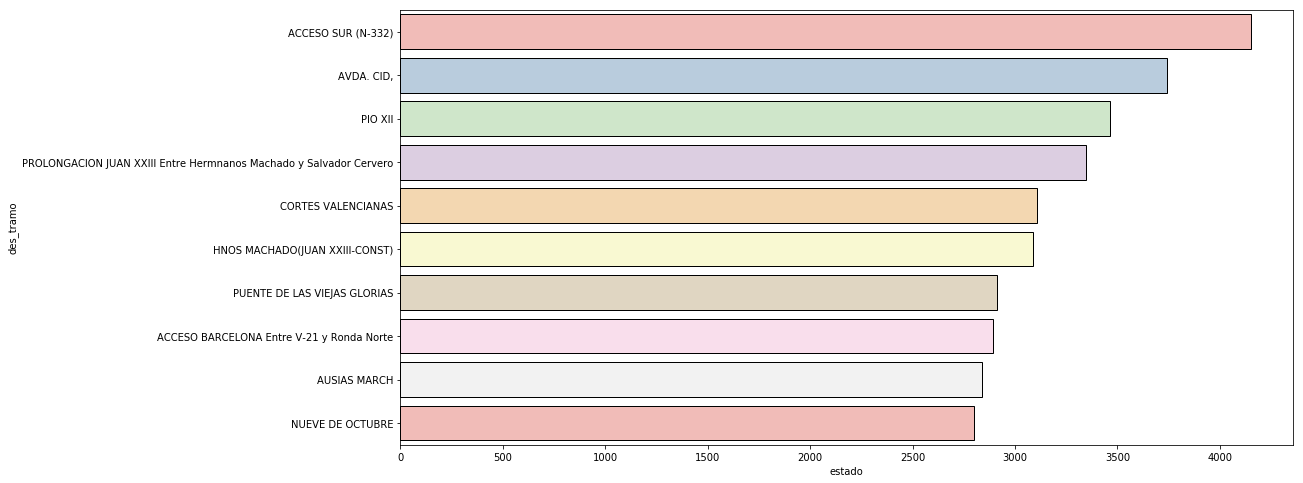

In [50]:
plt.subplots(figsize = (16,8))
sns.barplot(x='estado', y='des_tramo', data=df_max_tramo_diciembre,palette = sns.color_palette("Pastel1"), edgecolor = 'black')
plt.show()

### Totales Media Tráfico por  Tramo

In [52]:
#Filtramos por Año 2015
df_tramo_anual = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-01-01')& \
                              (df_datos_filtrados['fecha'] <= '2015-12-31')]\
                              .groupby(['id_tramo','des_tramo'])\
                              .estado.mean().to_frame().reset_index()
df_tramo_anual.head(10)

,id_tramo,des_tramo,estado
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3112.218845
1,A10,"ALAMEDA, PASEO DE",1232.184103
2,A102,ERNESTO FERRER,224.622799
3,A104,EUGENIA VIÑES,477.683109
4,A105,FILIPINAS,1034.019154
5,A106,FONTANARES,298.921670
6,A107,"FRANCIA, AVDA.",423.909707
7,A108,GASCO OLIAG,409.858074
8,A109,GASPAR AGUILAR,612.577042
9,A11,"ALAMEDA, PROLONGACION",320.524967


In [53]:
df_tramo_anual.dtypes

id_tramo      object
des_tramo     object
estado       float64
dtype: object

In [54]:
#Obtenemos los 10 tramos con mayor volumen de tráfico Año 2015
df_max_tramo_anual = df_tramo_anual.nlargest(10, ['estado']) 
df_max_tramo_anual

,id_tramo,des_tramo,estado
219,A373,ACCESO SUR (N-332),4280.202323
280,A72,"AVDA. CID,",3938.966835
92,A193,PIO XII,3475.915671
241,A406,PROLONGACION JUAN XXIII Entre Hermnanos Machad...,3467.211309
239,A398,HNOS MACHADO(JUAN XXIII-CONST),3236.469745
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,3112.218845
289,A82,CORTES VALENCIANAS,3111.617279
68,A170,NUEVE DE OCTUBRE,3074.893716
179,A29,AUSIAS MARCH,2947.768131
166,A271,PUENTE DE LAS VIEJAS GLORIAS,2919.940553


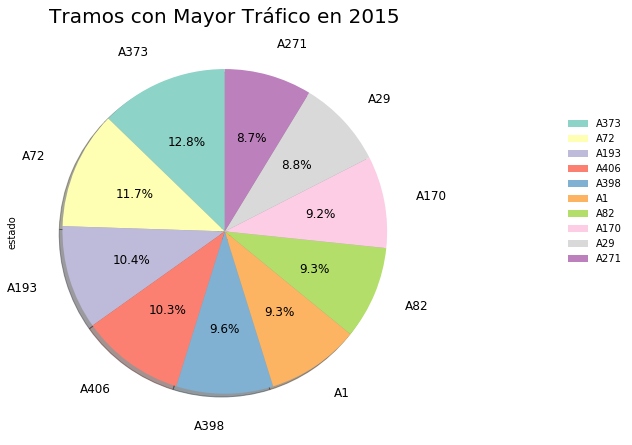

In [55]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
df_max_tramo_anual.plot(kind='pie', y = 'estado',colors = sns.color_palette("Set3"), ax=ax1, autopct='%1.1f%%',
 startangle=90,labeldistance=1.2, shadow=True, 
 labels=df_max_tramo_anual['id_tramo'], legend = False, fontsize=12)
ax1.set_title("Tramos con Mayor Tráfico en 2015",color='black',fontsize=20)
ax1.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

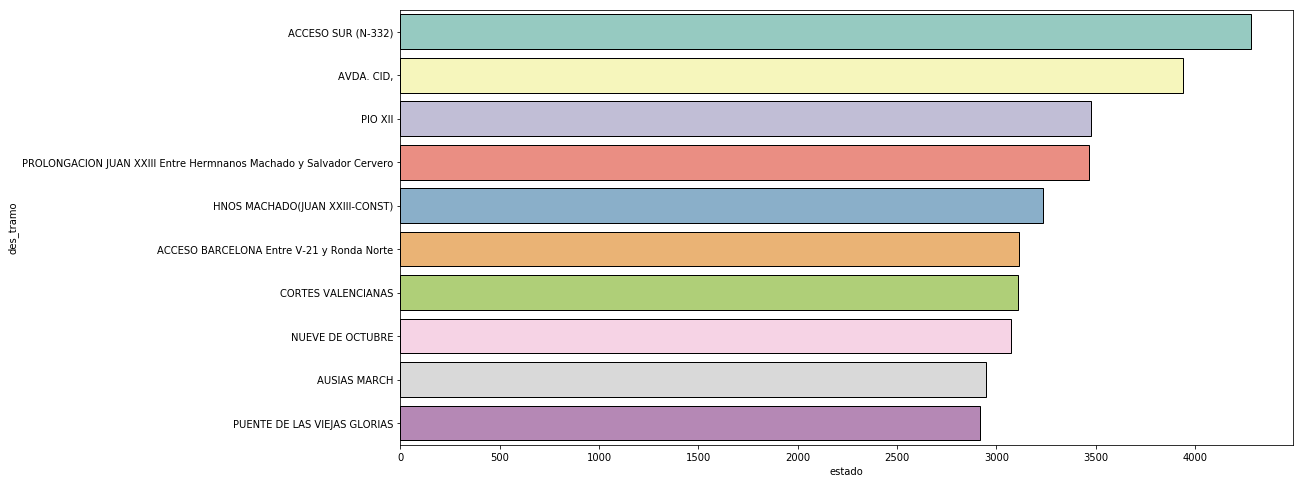

In [56]:
plt.subplots(figsize = (16,8))
sns.barplot(x='estado', y='des_tramo', data=df_max_tramo_anual,palette = sns.color_palette("Set3"), edgecolor = 'black')
plt.show()